In [3]:
# data analysis tools
import pandas as pd
import numpy as np

# visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price'])

In [5]:
#Melihat 5 baris teratas dari data.
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built.
#Dependent variabel(y) adalah price.
df.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7
1,538000.0,3,2.25,2570,7
2,180000.0,2,1.00,770,6
3,604000.0,4,3.00,1960,7
4,510000.0,3,2.00,1680,8


In [6]:
#Mengetahui jumlah kolom dan baris dari data.
#Data mempunyai 6 kolom (features) dengan 21613 baris.
df.shape

(21613, 5)

In [7]:
#Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [8]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000


In [9]:
# bathrooms terdapat pecahan
# bedrooms terdapat nilai 33

In [10]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['bathroom'] = df['bathrooms'].astype('int')

#Mengganti nilai 33 menjadi 3.
df['bedrooms'] = df['bedrooms'].replace(33, 3)

In [11]:
# 4. cek data yg kosong
#Mencari dan menangani missing values.
#Ternyata datanya sudah tidak ada missing values.

df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
bathroom       0
dtype: int64

C:\Users\gladis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


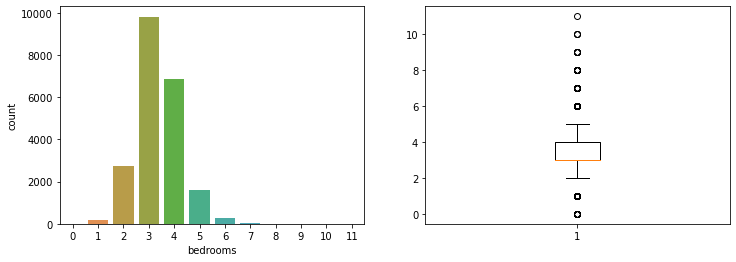

In [12]:
# 5. Exploratory Data Analysis (bedrooms)
#Univariate analysis bedrooms.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

In [13]:
# Dapat dilihat bahwa sebagian besar jumlah kamar tidur itu di angka 3 dan 4.
# Data memiliki banyak outliers.

C:\Users\gladis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


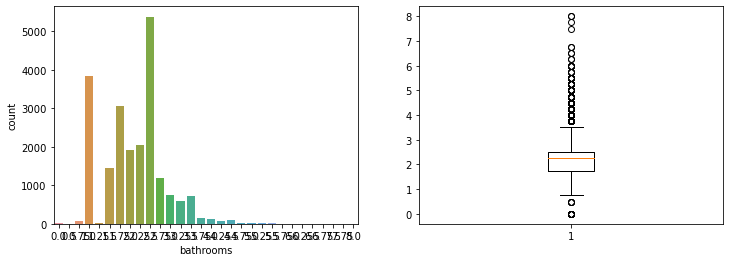

In [14]:
# Exploratory Data Analysis (bathrooms)

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

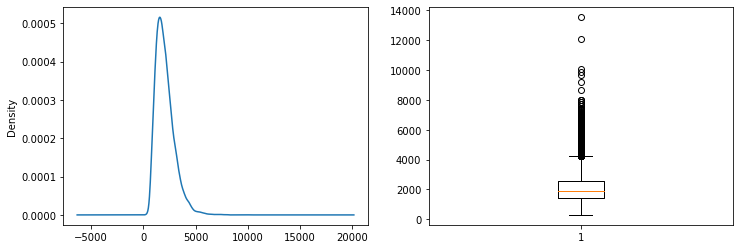

In [15]:
f = plt.figure(figsize = (12, 4))

f.add_subplot(1, 2, 1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1, 2, 2)
plt.boxplot(df['sqft_living'])
plt.show()

C:\Users\gladis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


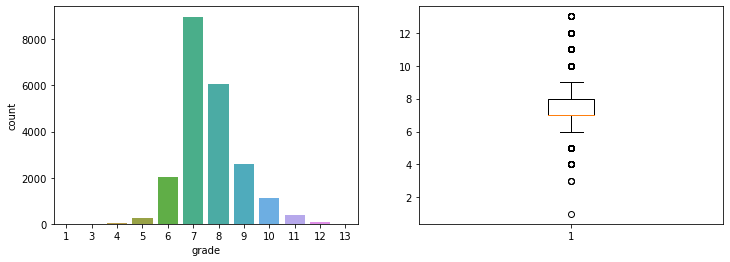

In [16]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

C:\Users\gladis\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

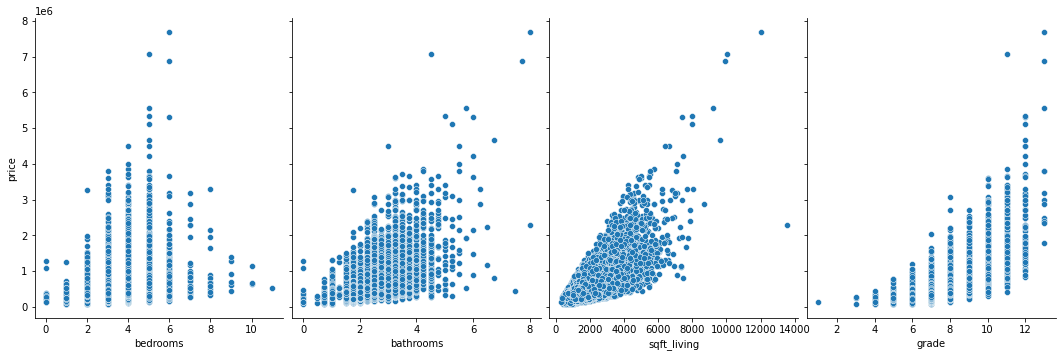

In [17]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade'], y_vars=['price'], size=5, aspect=0.75)

In [18]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
df.corr().style.background_gradient().set_precision(2)

C:\Users\gladis\AppData\Local\Temp/ipykernel_12760/3294473991.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,price,bedrooms,bathrooms,sqft_living,grade,bathroom
price,1.00,0.32,0.53,0.70,0.67,0.51
bedrooms,0.32,1.00,0.53,0.59,0.37,0.48
bathrooms,0.53,0.53,1.00,0.75,0.66,0.93
sqft_living,0.70,0.59,0.75,1.00,0.76,0.70
grade,0.67,0.37,0.66,0.76,1.00,0.61
bathroom,0.51,0.48,0.93,0.70,0.61,1.00


In [19]:
#Pertama, buat variabel x dan y.
x = df.drop(columns='price')
y = df['price']

#Kedua, split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#Ketiga, bikin object linear regresi.
lin_reg = LinearRegression()

#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)

#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ -44240.69417505 -106707.73582716     229.62103338   95716.89921218
   94248.88509634]
-460286.21153268253


In [20]:
lin_reg.score(x_test, y_test)

0.5440099790552907

In [91]:
lin_reg.predict([[3,2,1800,7,1990]])

array([1.87832194e+08])